**Write down a Matlab or Python code to simulate the averaging dynamics with stubborn node
set S = {Medici; Strozzi} and opinions u[medici] = 1 and u[strozzi] = -1**

Util functions to solve the exercise 4

In [120]:
import networkx as nx
import numpy as np

def map_label_index(nodes):
    indices = dict()
    for i in range(len(nodes)):
        indices[list(nodes)[i]] = i
        
    return indices,len(indices)

def create_graph(nodes,edges):
    G = nx.Graph()
    G.add_nodes_from(nodes)
    G.add_edges_from(links)
    return G

def get_P_matrix(G):
    A = nx.adjacency_matrix(G) # -> return type is scipy.sparse.csr_matrix
    A = A.toarray() # convert A to a numpy array
    degrees = np.sum(A,axis=1)
    D = np.diag(degrees)
    P = np.linalg.inv(D) @ A
    
    return P

def get_submatrices(P,regular_id,stubborn_id):
    # Submatrices
    # Using ix_ one can construct index arrays that will 
    # index a cross product.
    
    #For instamce:
    # a[np.ix_([1,3],[2,5])] returns the array [[a[1,2] a[1,5]], [a[3,2] a[3,5]]].
    Q = P[np.ix_(regular_id, regular_id)]
    E = P[np.ix_(regular_id, stubborn_id)]
    
    return Q,E

def evolve(x,n_iter,regular_id,stubborn_id,Q,E):
    
    for t in range(1,n_iter):
        x[regular_id, t] = Q @ x[regular_id, t-1] + E @ x[stubborn_id, t-1]
        x[stubborn_id, t] = x[stubborn_id, t-1];
            
    return x[:,n_iter-1]

def evolve_nu(x,n_iter,regular_id,stubborn_id,Q,E,nu=None):
    
    if nu is None:
        nu = np.ones(len(x))
    for t in range(1,n_iter):
        x[regular_id, t] = Q @ x[regular_id, t-1] + E @ x[stubborn_id, t-1]
        x[stubborn_id, t] = x[stubborn_id, t-1];
            
    return x[:,n_iter-1], nu * x[:,n_iter-1]

def show_best_placements(results,start_node=1):
    
    found = False
    max=-1
    s='{'
    for i,elem in enumerate(results):
        if i < len(results)-1 and not elem == results[i+1] :
            found = True
            
        if (elem >= max):
            max = elem
            s+=str(i+start_node+1) + ','
            
        
    if not found:
        print('Maximization of H(s) is independently from the placement of the second stubborn')
        return
    
    message = 'According to the numeration of nodes present in the uploaded pdf(.tex) file, maximization of H(s) is obtaining by choosing s as one of the element ot set of nodes:'+ s
    print(message[:-1] + '}')
    
    

**Cube**

Find the optimal placements of the second stubborn maximizing H(s)

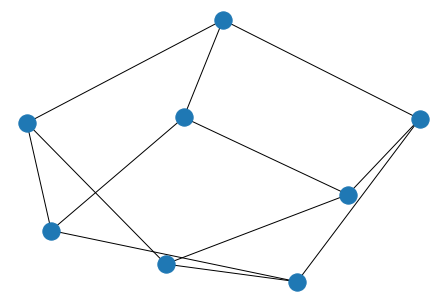

In [116]:
import numpy as np
nodes = np.arange(1,8+1)
links = [(1,2),(1,4),(1,5),(2,3),(2,6),(3,4),(3,8),(4,7),(5,6),(5,8),(6,7),(7,8)]

#nodes = np.arange(1,4+1)
#links = [(1,2),(1,3),(2,4),(3,4)]
G=create_graph(nodes,links)
nx.draw(G)

In [117]:
# Construct a dictionary that maps the label of nodes  

label_index,n_nodes = map_label_index(G.nodes)

start_node=1
end_node = n_nodes

results=[]
for i in range(start_node+1,end_node+1):
    # Number of iterations
    n_iter = 100;

    # Stubborn and regular nodes
    stubborn = [1,i];
    stubborn_id = [label_index.get(key) for key in stubborn]
    regular = [node for node in G.nodes if node not in stubborn]
    regular_id = [id for id in range(n_nodes) if id not in stubborn_id]

    # Input to stubborn nodes
    u = [0,1]

    # P matrix
    P = get_P_matrix(G)

    # Q,E submatrix of P, selected accordingly to the choosen regular nodes and stubborn nodes
    Q,E = get_submatrices(P,regular_id,stubborn_id)

    # Sample a random initial condition for regular nodes
    ic = np.random.uniform(0,1,len(regular))

    # Set the initial condition for the dynamics
    x = np.zeros((n_nodes,n_iter))
    x[stubborn_id,0] = u;
    x[regular_id,0] = ic;

    #Displaying the initial condition
    #print("Initial condition:\n")
    #for i,fam in enumerate(nodes):
        #print("\t",fam,":", x[i,0])

    x_final = evolve(x,n_iter,regular_id,stubborn_id,Q,E)
    mean_x_final = round(np.mean(x_final),3)
    
    results.append(mean_x_final)
    #Displaying the equilibrium vector
#    print("\n\nEquilibrium vector:\n")
#    for key in label_index.keys():
#        print("\t",key, x_final[label_index[key]])

show_best_placements(results)

Maximization of H(s) is independently from the placement of the second stubborn


**Cycle**

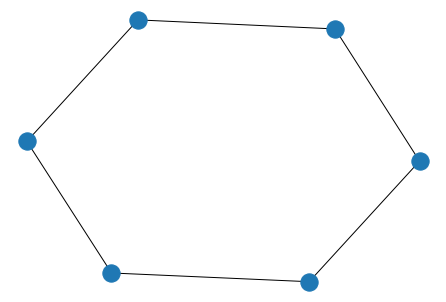

In [118]:
import numpy as np
G_len = 6
start = 1
nodes = np.arange(start,G_len + start)
links = [(1,2),(2,3),(3,4),(4,5),(5,6),(1,6)]
    
#Opinion vector nu
nu = np.array([1,3,2,3,2,3])

G=create_graph(nodes,links)
nx.draw(G)

Find the optimal placements of the second stubborn maximizing H(s)

In [119]:
# Construct a dictionary that maps the label of nodes  

label_index,n_nodes = map_label_index(G.nodes)

start_node=1
end_node = n_nodes

results=[]
for i in range(start_node+1,end_node+1):
    # Number of iterations
    n_iter = 100;

    # Stubborn and regular nodes
    stubborn = [1,i];
    stubborn_id = [label_index.get(key) for key in stubborn]
    regular = [node for node in G.nodes if node not in stubborn]
    regular_id = [id for id in range(n_nodes) if id not in stubborn_id]

    # Input to stubborn nodes
    u = [0,1]

    # P matrix
    P = get_P_matrix(G)

    # Q,E submatrix of P, selected accordingly to the choosen regular nodes and stubborn nodes
    Q,E = get_submatrices(P,regular_id,stubborn_id)

    # Sample a random initial condition for regular nodes
    ic = np.random.uniform(0,1,len(regular))

    # Set the initial condition for the dynamics
    x = np.zeros((n_nodes,n_iter))
    x[stubborn_id,0] = u;
    x[regular_id,0] = ic;

    #Displaying the initial condition
    #print("Initial condition:\n")
    #for i,fam in enumerate(nodes):
        #print("\t",fam,":", x[i,0])

    x_final,xbar_final = evolve_nu(x,n_iter,regular_id,stubborn_id,Q,E,nu)
    mean_x_final = round(np.mean(x_final),3)
    
    #This is the mean to use to check the solution!
    mean_xbar_final = round(np.mean(xbar_final),3)
    
    results.append(mean_xbar_final)
    #Displaying the equilibrium vector
#    print("\n\nEquilibrium vector:\n")
#    for key in label_index.keys():
#        print("\t",key, x_final[label_index[key]])
show_best_placements(results)

Accorting to the numeration of nodes present in the uploader pdf(.tex) file, maximization of H(s) is obtaining by choosing s as one of the element ot set of nodes:{2,6}
